In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import subprocess
import xml.etree.ElementTree as ET
import os
%matplotlib inline

In [20]:
cols = [["Average Throughput(Mbps)", "std avg throughput"], 
        ["Average Goodput(Mbps)", "std goodput"], 
        ["Link Utilization", "std link utilization"],
        ["Queuing Delay(ms)", "std queuing delay"],
        ["Flow Completion Time(s)", "std flow comp time(s)"],
        ["Packet loss %", "std pkt loss"]]

# inf data
nr / NR : new reno  
LN: Linux reno

In [21]:
data_naqm = pd.read_csv("a_results_LN_naqm_zc.csv")
data_aqm = pd.read_csv("a_results_LN_aqm_zc.csv")
data_naqm_10 = data_naqm[:10]
data_aqm_10 = data_aqm[:10]
data_naqm_11 = data_naqm[10:]
data_aqm_11 = data_aqm[10:]

data_naqm_nr = pd.read_csv("a_results_NR_naqm_zc.csv")
data_aqm_nr = pd.read_csv("a_results_NR_aqm_zc.csv")
data_naqm_10_nr = data_naqm_nr[:10]
data_aqm_10_nr = data_aqm_nr[:10]
data_naqm_11_nr = data_naqm_nr[10:]
data_aqm_11_nr = data_aqm_nr[10:]

In [22]:
data_naqm

,Simulation_number,Random Seed,RTT,Global Sync Value,Average Throughput(Mbps),std avg throughput,Average Goodput(Mbps),std goodput,Link Utilization,std link utilization,Flow Completion Time(s),std flow comp time(s),Averate Data Sent(Mb),Effective Delay(ms),Jitter in RTT(ms),Queuing Delay(ms),std queuing delay,Packet loss %,std pkt loss
0,0,69713,200,0.395283,1.588066,0.055639,1.586153,0.055699,97.515567,2.575952,498.272693,1.716637,791.111502,199.299359,0.001370,0.112559,0.037007,0.128284,0.019508
1,1,56629,200,0.386983,1.588001,0.067031,1.586123,0.067080,97.451902,2.337772,497.047788,2.166819,789.034151,199.601338,0.001342,0.112988,0.036635,0.124841,0.017118
2,2,86799,200,0.386274,1.587121,0.059045,1.585323,0.059113,97.598128,2.302370,497.844628,1.637381,789.910801,200.251977,0.001368,0.112227,0.036983,0.120513,0.018746
3,3,42653,200,0.392096,1.587446,0.065963,1.585632,0.066038,97.595562,2.411728,498.226927,1.561774,790.683508,199.931169,0.001394,0.111719,0.037341,0.122783,0.020370
4,4,82842,200,0.389707,1.587665,0.085607,1.585802,0.085783,97.702174,2.387550,497.077785,1.959053,788.971419,199.817671,0.001403,0.111738,0.037452,0.125002,0.026987
5,5,72958,200,0.394009,1.588069,0.069975,1.586246,0.070042,97.418753,2.490225,498.026590,1.747792,790.687500,200.138592,0.001401,0.111726,0.037426,0.122897,0.017192
6,6,23256,200,0.385185,1.588064,0.068828,1.586179,0.068931,97.637544,2.344649,498.086501,1.270448,790.577858,200.484799,0.001352,0.112933,0.036763,0.125678,0.021755
7,7,14590,200,0.393086,1.587821,0.079613,1.585934,0.079716,97.498020,2.418966,497.218953,1.766969,789.339525,199.562852,0.001360,0.112702,0.036876,0.126191,0.019791
8,8,98472,200,0.391850,1.587711,0.061777,1.585828,0.061853,97.597103,2.335032,498.183281,1.679000,790.776003,199.404489,0.001368,0.112556,0.036987,0.126772,0.019738
9,9,8288,200,0.390917,1.587935,0.070811,1.586083,0.070909,97.592385,2.484033,497.189948,1.779935,789.276519,200.709691,0.001388,0.111875,0.037253,0.123279,0.018661


In [23]:
data_aqm

,Simulation_number,Random Seed,RTT,Global Sync Value,Average Throughput(Mbps),std avg throughput,Average Goodput(Mbps),std goodput,Link Utilization,std link utilization,Flow Completion Time(s),std flow comp time(s),Averate Data Sent(Mb),Effective Delay(ms),Jitter in RTT(ms),Queuing Delay(ms),std queuing delay,Packet loss %,std pkt loss
0,0,69713,200,0.652118,1.559113,0.101209,1.554347,0.101667,94.288944,4.143456,498.307743,1.635536,776.737183,199.208966,0.002225,0.022166,0.047169,0.313398,0.059440
1,1,56629,200,0.649242,1.557638,0.097193,1.552939,0.097592,94.271051,4.065997,497.183771,2.151999,774.260437,199.510664,0.002241,0.022314,0.047340,0.308382,0.055244
2,2,86799,200,0.648344,1.556866,0.096254,1.552080,0.096707,94.344510,4.191155,497.999011,1.708483,775.120517,200.162512,0.002256,0.022762,0.047498,0.314219,0.058483
3,3,42653,200,0.641759,1.555387,0.129645,1.550526,0.130266,94.218511,4.366195,498.160444,1.536324,774.672645,199.841969,0.002231,0.022519,0.047237,0.323550,0.076304
4,4,82842,200,0.650352,1.556887,0.095420,1.552163,0.095750,94.317732,4.180625,497.136019,1.993674,773.809450,199.726227,0.002058,0.020294,0.045364,0.310352,0.052415
5,5,72958,200,0.645251,1.559299,0.104056,1.554649,0.104511,94.403459,4.180868,498.096657,1.825498,776.494404,200.049256,0.002229,0.022390,0.047216,0.306011,0.057514
6,6,23256,200,0.649066,1.556514,0.124576,1.551586,0.125131,94.245993,4.236600,498.200735,1.257902,775.288654,200.394294,0.002240,0.022427,0.047325,0.325883,0.074281
7,7,14590,200,0.646454,1.557358,0.113245,1.552264,0.113781,94.228736,4.227436,497.228420,1.823452,774.187626,199.472197,0.002209,0.022047,0.047002,0.334626,0.070851
8,8,98472,200,0.648226,1.555848,0.108062,1.551069,0.108511,94.178331,4.226399,498.255348,1.691567,775.065262,199.314118,0.002230,0.022185,0.047218,0.316337,0.062378
9,9,8288,200,0.643474,1.556639,0.128161,1.551744,0.128707,94.239562,4.387428,497.190064,1.708858,773.752638,200.619586,0.002184,0.021769,0.046734,0.322474,0.071719


In [24]:
data_naqm_nr

,Simulation_number,Random Seed,RTT,Global Sync Value,Average Throughput(Mbps),std avg throughput,Average Goodput(Mbps),std goodput,Link Utilization,std link utilization,Flow Completion Time(s),std flow comp time(s),Averate Data Sent(Mb),Effective Delay(ms),Jitter in RTT(ms),Queuing Delay(ms),std queuing delay,Packet loss %,std pkt loss
0,0,69713,200,0.155469,1.586442,0.090230,1.585699,0.090288,98.519899,1.723306,598.265176,1.699097,948.916674,199.301188,0.001172,0.114388,0.034229,0.051149,0.016405
1,1,56629,200,0.154239,1.586548,0.087246,1.585811,0.087329,98.558745,1.775874,597.056404,2.153429,946.958893,199.603746,0.001171,0.115396,0.034217,0.051054,0.014660
2,2,86799,200,0.151873,1.586734,0.082779,1.586038,0.082806,98.302203,1.867563,597.835978,1.648038,948.312757,200.255808,0.001090,0.116058,0.033014,0.048840,0.012039
3,3,42653,200,0.152960,1.587035,0.081865,1.586338,0.081914,98.488450,1.830703,598.195161,1.548748,949.051161,199.934945,0.001100,0.115495,0.033174,0.048504,0.013122
4,4,82842,200,0.154661,1.586260,0.071481,1.585512,0.071575,98.177040,1.479730,597.072035,2.006024,946.816366,199.820005,0.001205,0.114072,0.034709,0.051561,0.013990
5,5,72958,200,0.152150,1.586445,0.084625,1.585737,0.084709,98.476500,1.668117,597.995140,1.759688,948.364817,200.142084,0.001188,0.115217,0.034471,0.048899,0.015564
6,6,23256,200,0.151756,1.585554,0.078779,1.584860,0.078836,98.769039,1.736108,598.236485,1.232965,948.242139,200.486380,0.001167,0.114513,0.034157,0.048576,0.015748
7,7,14590,200,0.154051,1.586960,0.095401,1.586264,0.095480,98.753079,1.790748,597.179120,1.806009,947.415987,199.564341,0.001190,0.114191,0.034503,0.049017,0.015849
8,8,98472,200,0.155529,1.586916,0.084907,1.586203,0.084961,98.366868,1.719476,598.148414,1.697817,948.948377,199.406285,0.001155,0.114352,0.033982,0.049833,0.013534
9,9,8288,200,0.152612,1.586620,0.079971,1.585930,0.080033,98.467758,1.653514,597.177381,1.776069,947.299297,200.713132,0.001106,0.115316,0.033264,0.047301,0.015681


In [25]:
data_aqm_nr

,Simulation_number,Random Seed,RTT,Global Sync Value,Average Throughput(Mbps),std avg throughput,Average Goodput(Mbps),std goodput,Link Utilization,std link utilization,Flow Completion Time(s),std flow comp time(s),Averate Data Sent(Mb),Effective Delay(ms),Jitter in RTT(ms),Queuing Delay(ms),std queuing delay,Packet loss %,std pkt loss
0,0,69713,200,0.352678,1.537759,0.176441,1.535514,0.176604,92.971824,4.810533,598.382360,1.769712,919.999910,199.207078,0.002072,0.020278,0.045516,0.153412,0.039460
1,1,56629,200,0.350694,1.540313,0.132403,1.538304,0.132630,93.075535,4.743921,597.256988,2.129831,919.829960,199.507282,0.002028,0.018932,0.045032,0.136800,0.034147
2,2,86799,200,0.354297,1.534606,0.170438,1.532455,0.170591,92.812482,5.276437,598.007311,1.777952,917.521636,200.159327,0.002015,0.019577,0.044890,0.148126,0.038477
3,3,42653,200,0.346879,1.539505,0.153698,1.537412,0.153929,93.082356,4.860006,598.356794,1.543766,921.001678,199.839222,0.002040,0.019772,0.045163,0.143546,0.037604
4,4,82842,200,0.350258,1.542392,0.150957,1.540280,0.151154,93.050485,4.189885,597.220535,1.954930,920.915032,199.723335,0.001813,0.017402,0.042581,0.144758,0.037394
5,5,72958,200,0.349012,1.536995,0.149786,1.534845,0.150055,92.899917,5.350090,598.128890,1.770959,919.163443,200.045622,0.001983,0.018755,0.044535,0.146865,0.040116
6,6,23256,200,0.353647,1.536161,0.158943,1.533959,0.159106,92.936047,4.721682,598.446535,1.247032,919.097031,200.391422,0.002006,0.019555,0.044790,0.151581,0.036978
7,7,14590,200,0.350487,1.538902,0.150448,1.536838,0.150623,93.030561,4.493191,597.396303,1.783930,919.157202,199.469420,0.002025,0.019270,0.044999,0.142188,0.035584
8,8,98472,200,0.350746,1.533904,0.165141,1.531696,0.165422,92.653158,5.394621,598.279181,1.694202,917.540561,199.311764,0.002032,0.019831,0.045081,0.153211,0.044990
9,9,8288,200,0.340243,1.544850,0.147625,1.542873,0.147861,93.380322,4.343080,597.190364,1.809931,922.410316,200.617375,0.002059,0.019558,0.045371,0.134121,0.034750


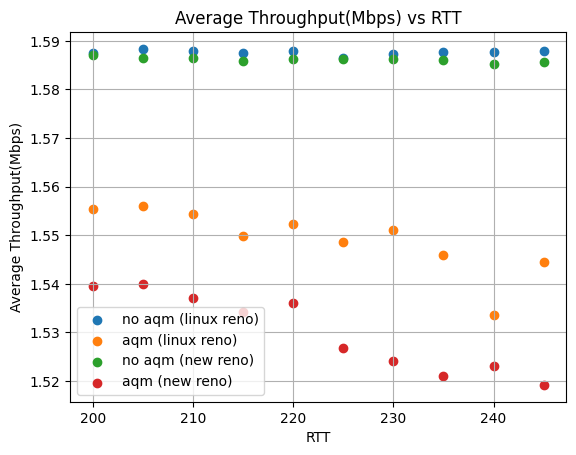

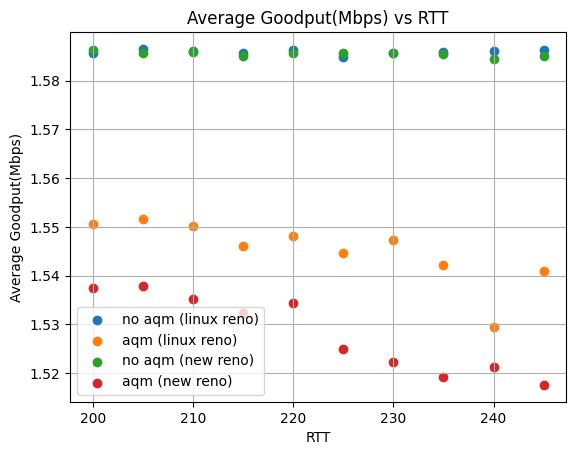

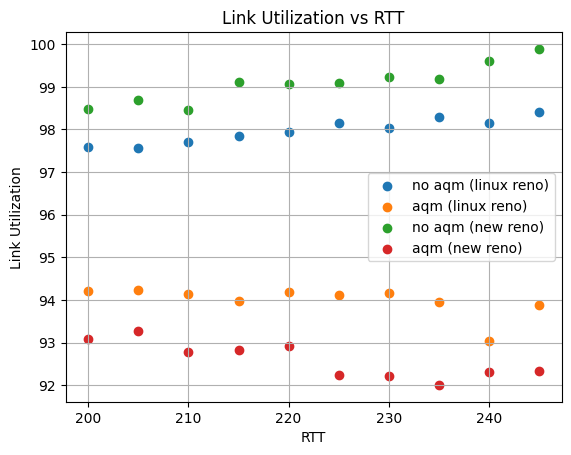

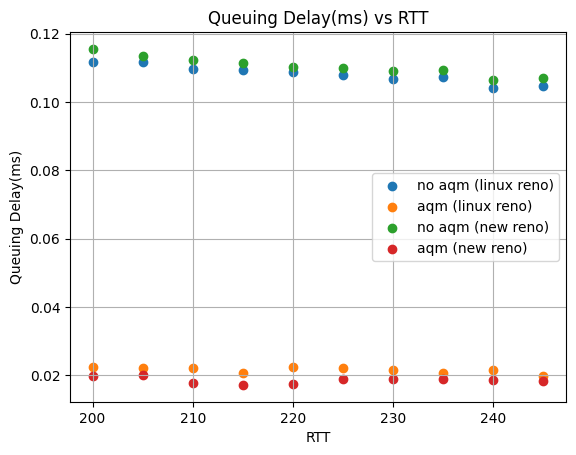

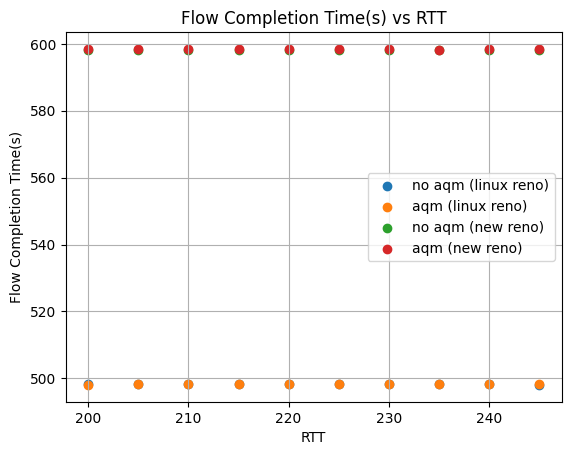

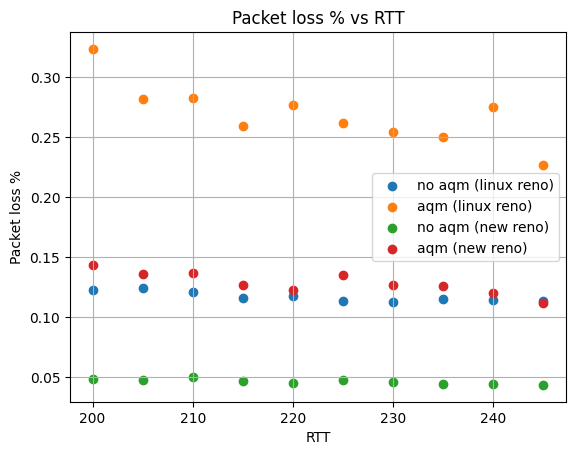

In [26]:
for c in cols:
    c = c[0]
    plt.scatter(list(data_naqm_11["RTT"]), list(data_naqm_11[c]), label="no aqm (linux reno)")
    plt.scatter(list(data_aqm_11["RTT"]), list(data_aqm_11[c]), label = "aqm (linux reno)")
    plt.scatter(list(data_naqm_11_nr["RTT"]), list(data_naqm_11_nr[c]), label="no aqm (new reno)")
    plt.scatter(list(data_aqm_11_nr["RTT"]), list(data_aqm_11_nr[c]), label = "aqm (new reno)")
    plt.xlabel("RTT")
    plt.ylabel(c)
    plt.title(f"{c} vs RTT")
    plt.grid()
    plt.legend()
    plt.show()

### TCP Linux Reno

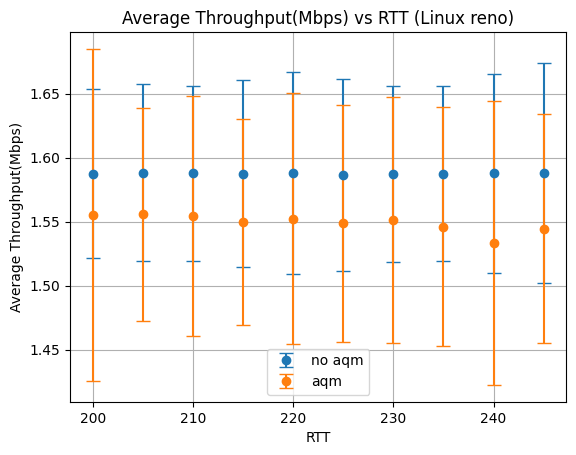

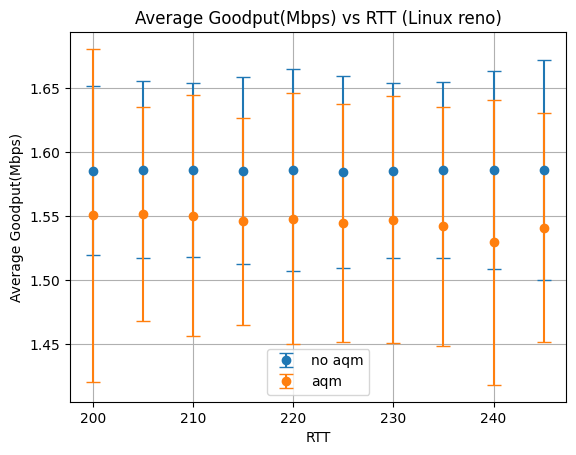

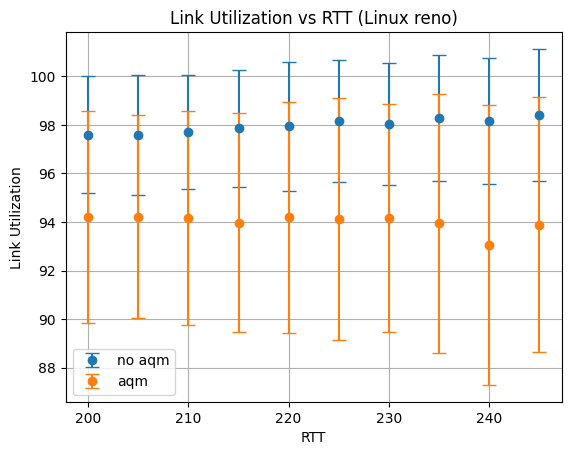

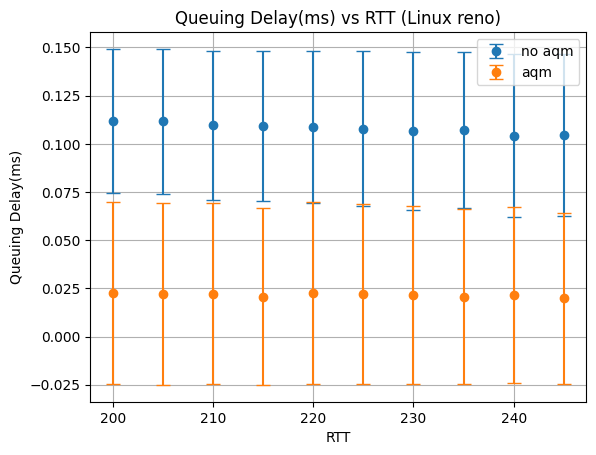

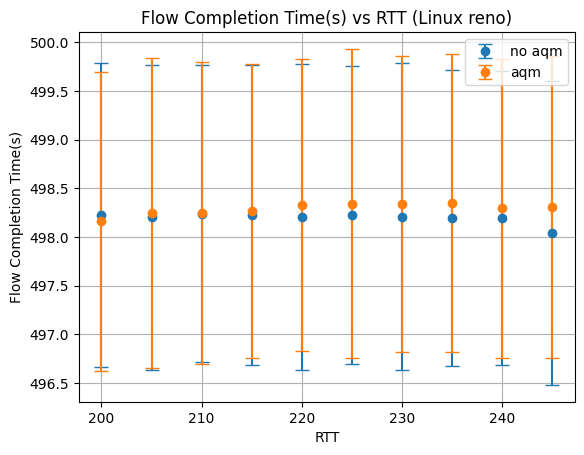

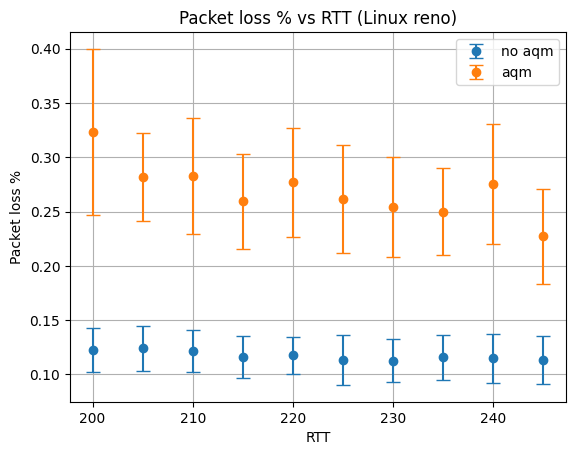

In [27]:

for c in cols:
    plt.errorbar(x=list(data_naqm_11["RTT"]), y=list(data_naqm_11[c[0]]), yerr=list(data_naqm_11[c[1]]), fmt='o', capsize=5, label = "no aqm")
    plt.errorbar(x=list(data_aqm_11["RTT"]), y=list(data_aqm_11[c[0]]), yerr=list(data_aqm_11[c[1]]), fmt='o', capsize=5, label = "aqm")
    plt.xlabel("RTT")
    plt.ylabel(c[0])
    plt.title(f"{c[0]} vs RTT (Linux reno)")
    plt.grid()
    plt.legend()
    plt.show()

### TCP new reno

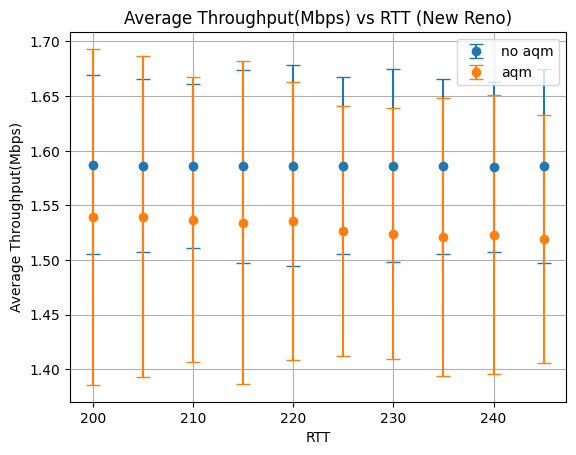

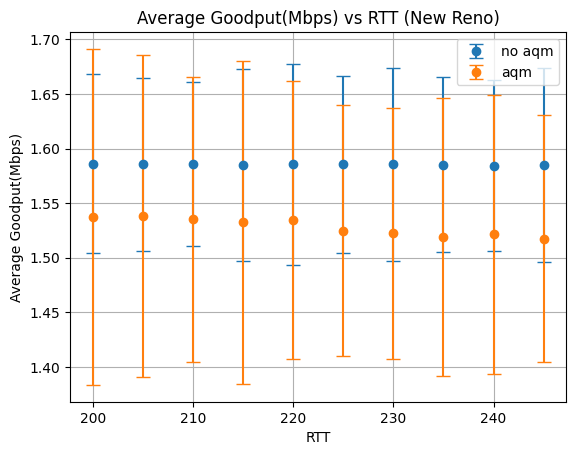

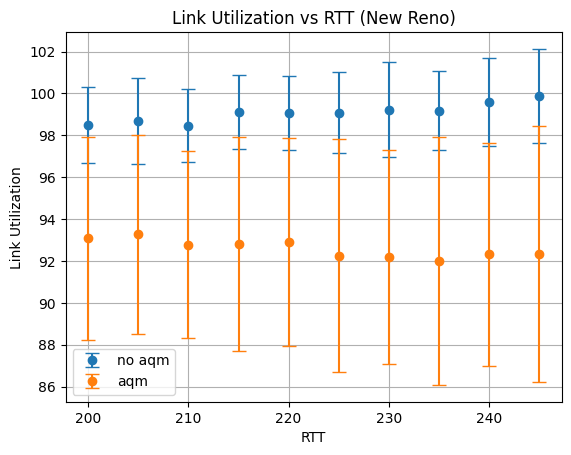

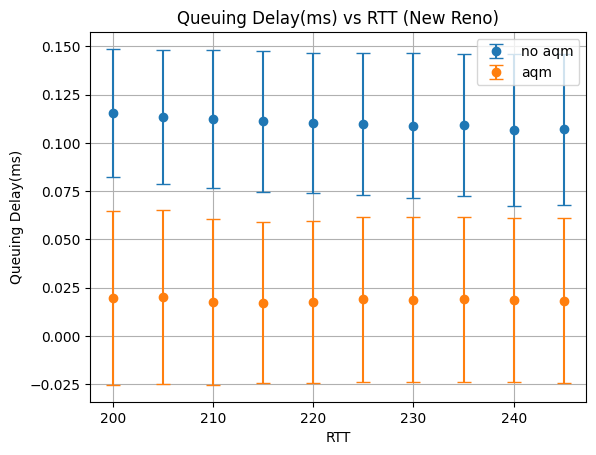

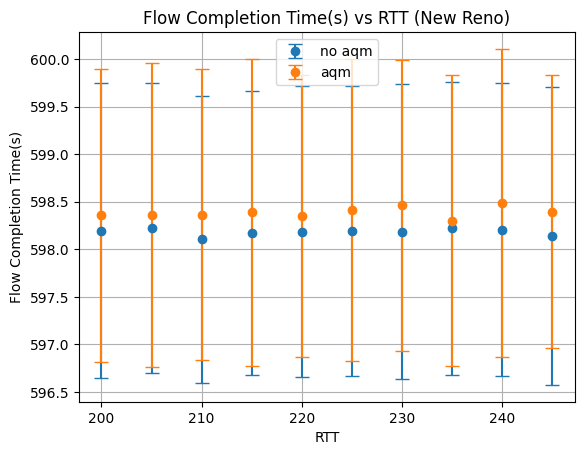

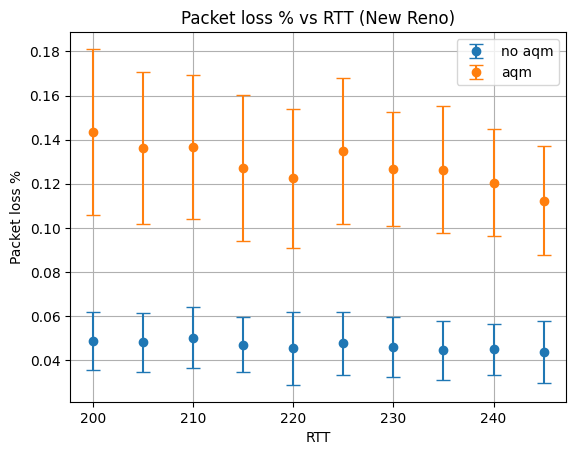

In [28]:
for c in cols:
    plt.errorbar(x=list(data_naqm_11_nr["RTT"]), y=list(data_naqm_11_nr[c[0]]), yerr=list(data_naqm_11_nr[c[1]]), fmt='o', capsize=5, label = "no aqm")
    plt.errorbar(x=list(data_aqm_11_nr["RTT"]), y=list(data_aqm_11_nr[c[0]]), yerr=list(data_aqm_11_nr[c[1]]), fmt='o', capsize=5, label = "aqm")
    plt.xlabel("RTT")
    plt.ylabel(c[0])
    plt.title(f"{c[0]} vs RTT (New Reno)")
    plt.grid()
    plt.legend()
    plt.show()

# 100 MB

In [29]:
data_naqm = pd.read_csv("a_results_LN_naqm_zc_100MB.csv")
data_aqm = pd.read_csv("a_results_LN_aqm_zc_100MB.csv")
data_naqm_10 = data_naqm[:10]
data_aqm_10 = data_aqm[:10]
data_naqm_11 = data_naqm[10:]
data_aqm_11 = data_aqm[10:]

data_naqm_nr = pd.read_csv("a_results_NR_naqm_zc_100MB.csv")
data_aqm_nr = pd.read_csv("a_results_NR_aqm_zc_100MB.csv")
data_naqm_10_nr = data_naqm_nr[:10]
data_aqm_10_nr = data_aqm_nr[:10]
data_naqm_11_nr = data_naqm_nr[10:]
data_aqm_11_nr = data_aqm_nr[10:]

In [30]:
data_naqm

,Simulation_number,Random Seed,RTT,Global Sync Value,Average Throughput(Mbps),std avg throughput,Average Goodput(Mbps),std goodput,Link Utilization,std link utilization,Flow Completion Time(s),std flow comp time(s),Averate Data Sent(Mb),Effective Delay(ms),Jitter in RTT(ms),Queuing Delay(ms),std queuing delay,Packet loss %,std pkt loss
0,0,69713,200,0.196422,1.601688,0.044971,1.599873,0.044984,90.955198,22.269191,523.704826,14.168735,837.963221,199.243992,0.003834,0.057192,0.061918,0.119907,0.016554
1,1,56629,200,0.192387,1.606060,0.055469,1.604265,0.055451,92.355516,19.150065,522.514588,17.187605,838.029674,199.545649,0.003873,0.057299,0.062232,0.117056,0.014609
2,2,86799,200,0.189652,1.603630,0.049557,1.601939,0.049573,93.275666,18.264230,523.020261,15.207169,837.758606,200.197311,0.003865,0.057561,0.062171,0.111370,0.015587
3,3,42653,200,0.193255,1.604726,0.054593,1.603000,0.054615,92.302626,19.561351,522.774061,16.959075,837.760500,199.876302,0.003823,0.056852,0.061832,0.114741,0.017127
4,4,82842,200,0.192721,1.607946,0.067164,1.606175,0.067268,87.435382,27.128948,522.127919,21.634293,837.905055,199.761664,0.003802,0.055731,0.061659,0.116178,0.021454
5,5,72958,200,0.194832,1.605214,0.057284,1.603489,0.057294,91.043927,21.052251,522.744557,17.975605,837.891583,200.082811,0.003787,0.055944,0.061536,0.114277,0.013845
6,6,23256,200,0.191743,1.603814,0.055657,1.602029,0.055699,88.823525,25.782951,523.198818,17.538693,837.929751,200.428960,0.003868,0.057093,0.062190,0.117091,0.018148
7,7,14590,200,0.193226,1.606994,0.063549,1.605210,0.063588,89.276994,24.030603,522.393420,20.236652,837.991418,199.506707,0.003860,0.056557,0.062126,0.116761,0.016118
8,8,98472,200,0.194178,1.604154,0.050542,1.602369,0.050565,93.489740,16.644054,522.980981,15.608914,837.949522,199.348949,0.003821,0.057016,0.061815,0.118318,0.016779
9,9,8288,200,0.192777,1.605391,0.057492,1.603632,0.057523,92.149196,19.383813,522.767348,18.116519,837.994965,200.654274,0.003809,0.056457,0.061717,0.114689,0.014367


In [31]:
data_aqm

,Simulation_number,Random Seed,RTT,Global Sync Value,Average Throughput(Mbps),std avg throughput,Average Goodput(Mbps),std goodput,Link Utilization,std link utilization,Flow Completion Time(s),std flow comp time(s),Averate Data Sent(Mb),Effective Delay(ms),Jitter in RTT(ms),Queuing Delay(ms),std queuing delay,Packet loss %,std pkt loss
0,0,69713,200,0.318339,1.588053,0.078192,1.583625,0.078384,85.414330,24.998414,527.946826,25.782583,836.238236,199.197809,0.001222,0.011009,0.034962,0.281490,0.036062
1,1,56629,200,0.318463,1.584442,0.076745,1.580066,0.076922,84.781053,25.489476,529.151654,25.993443,836.262254,199.499417,0.001231,0.011067,0.035081,0.278045,0.033902
2,2,86799,200,0.318946,1.585028,0.075615,1.580569,0.075877,85.359528,25.025914,528.808961,25.242784,836.115231,200.151054,0.001244,0.011304,0.035273,0.283851,0.039641
3,3,42653,200,0.309628,1.590209,0.101161,1.585769,0.101456,84.200602,24.683243,528.313094,34.363569,836.501048,199.830629,0.001230,0.011179,0.035069,0.282337,0.043284
4,4,82842,200,0.323607,1.581257,0.073347,1.576835,0.073469,84.734617,25.376035,529.952235,24.945894,836.006886,199.716005,0.001119,0.010071,0.033447,0.282572,0.035411
5,5,72958,200,0.315104,1.587096,0.081604,1.582765,0.081833,86.671746,22.155907,528.453340,27.606858,836.299459,200.037975,0.001226,0.011109,0.035015,0.275615,0.035241
6,6,23256,200,0.317806,1.587632,0.094425,1.583030,0.094655,81.573735,28.516099,528.823668,33.054233,836.308246,200.383016,0.001234,0.011149,0.035126,0.292120,0.041407
7,7,14590,200,0.314903,1.587861,0.088261,1.583149,0.088532,87.193324,20.439608,528.578003,29.540896,836.546618,199.461084,0.001212,0.010934,0.034818,0.297961,0.046172
8,8,98472,200,0.318868,1.585644,0.084491,1.581197,0.084734,83.965763,25.859679,529.057931,28.554768,836.333856,199.302955,0.001225,0.011022,0.035001,0.284311,0.039897
9,9,8288,200,0.311466,1.590232,0.096589,1.585748,0.096832,86.232514,21.937910,528.152464,32.397027,836.604005,200.608611,0.001197,0.010794,0.034594,0.282591,0.042093


In [32]:
data_naqm_nr

,Simulation_number,Random Seed,RTT,Global Sync Value,Average Throughput(Mbps),std avg throughput,Average Goodput(Mbps),std goodput,Link Utilization,std link utilization,Flow Completion Time(s),std flow comp time(s),Averate Data Sent(Mb),Effective Delay(ms),Jitter in RTT(ms),Queuing Delay(ms),std queuing delay,Packet loss %,std pkt loss
0,0,69713,200,0.072591,1.609207,0.075032,1.608464,0.075075,90.123302,23.612304,519.453626,24.280852,833.869811,199.244157,0.003875,0.057357,0.062248,0.050096,0.017276
1,1,56629,200,0.073362,1.609571,0.072370,1.608829,0.072432,90.979435,22.739096,519.230954,22.713733,833.894703,199.545659,0.003895,0.057309,0.062412,0.050705,0.014997
2,2,86799,200,0.074419,1.610526,0.079245,1.609815,0.079242,88.121807,25.900604,519.141528,25.844153,833.848258,200.196096,0.003821,0.056346,0.061815,0.049228,0.013222
3,3,42653,200,0.073334,1.608480,0.071503,1.607767,0.071520,86.164474,29.747719,519.578894,23.404063,833.854001,199.877256,0.003910,0.057806,0.062526,0.048814,0.013147
4,4,82842,200,0.076547,1.602713,0.058286,1.601937,0.058371,90.879170,22.308352,521.014419,19.060181,833.727242,199.763078,0.003837,0.057145,0.061942,0.052895,0.014069
5,5,72958,200,0.072485,1.606954,0.067567,1.606241,0.067636,90.502919,24.188565,519.932807,21.258810,833.867836,200.084280,0.003881,0.057413,0.062302,0.048046,0.015459
6,6,23256,200,0.072697,1.605221,0.069773,1.604517,0.069807,88.590412,26.709323,520.575935,22.926077,833.829221,200.429036,0.003858,0.057170,0.062117,0.048701,0.016022
7,7,14590,200,0.072757,1.612498,0.081162,1.611797,0.081203,89.097453,25.671699,518.561703,26.104341,833.848666,199.506346,0.003839,0.056196,0.061958,0.048375,0.015280
8,8,98472,200,0.074417,1.611728,0.077103,1.611006,0.077136,87.382861,27.398048,518.631398,24.802720,833.788233,199.348016,0.003811,0.056082,0.061731,0.049865,0.013627
9,9,8288,200,0.073286,1.609409,0.071482,1.608714,0.071540,91.881277,19.994208,519.285681,22.982593,833.900134,200.654271,0.003813,0.056454,0.061748,0.046939,0.017384


In [33]:
data_aqm_nr

,Simulation_number,Random Seed,RTT,Global Sync Value,Average Throughput(Mbps),std avg throughput,Average Goodput(Mbps),std goodput,Link Utilization,std link utilization,Flow Completion Time(s),std flow comp time(s),Averate Data Sent(Mb),Effective Delay(ms),Jitter in RTT(ms),Queuing Delay(ms),std queuing delay,Packet loss %,std pkt loss
0,0,69713,200,0.161768,1.583835,0.127597,1.581725,0.127568,76.691892,30.778770,529.640110,45.435307,832.935272,199.198834,0.001334,0.012034,0.036526,0.136273,0.023175
1,1,56629,200,0.162449,1.582186,0.108685,1.580264,0.108790,77.858601,31.138834,528.986121,37.677660,832.724451,199.499601,0.001294,0.011251,0.035968,0.125518,0.024632
2,2,86799,200,0.161376,1.584186,0.124631,1.582123,0.124581,78.141550,29.889001,529.269428,43.705993,832.885850,200.151376,0.001293,0.011626,0.035962,0.134016,0.023602
3,3,42653,200,0.162321,1.578806,0.109737,1.576796,0.109828,83.526240,23.040854,530.280611,37.784602,832.915349,199.831204,0.001310,0.011754,0.036193,0.131669,0.024620
4,4,82842,200,0.160044,1.587339,0.123748,1.585347,0.123803,78.208850,29.520724,528.102285,43.381773,832.772912,199.716265,0.001153,0.010332,0.033951,0.130021,0.024792
5,5,72958,200,0.160341,1.580036,0.110820,1.578024,0.110904,83.985302,23.082396,529.806307,37.252430,832.839641,200.037996,0.001266,0.011130,0.035584,0.130874,0.027611
6,6,23256,200,0.162882,1.581826,0.123866,1.579756,0.123880,76.279078,31.585335,529.977785,43.693078,832.793203,200.383488,0.001289,0.011621,0.035900,0.136004,0.025522
7,7,14590,200,0.162051,1.582923,0.118059,1.580962,0.118105,81.373637,26.043944,529.265687,40.381647,832.875989,199.461597,0.001295,0.011447,0.035992,0.128903,0.023879
8,8,98472,200,0.163915,1.575281,0.114196,1.573179,0.114274,79.292174,28.125940,531.798398,40.634665,832.949829,199.303704,0.001306,0.011770,0.036144,0.138515,0.025912
9,9,8288,200,0.157445,1.587078,0.111808,1.585211,0.111873,82.443871,25.538027,527.535764,37.798548,832.869132,200.609439,0.001318,0.011622,0.036303,0.120842,0.023718


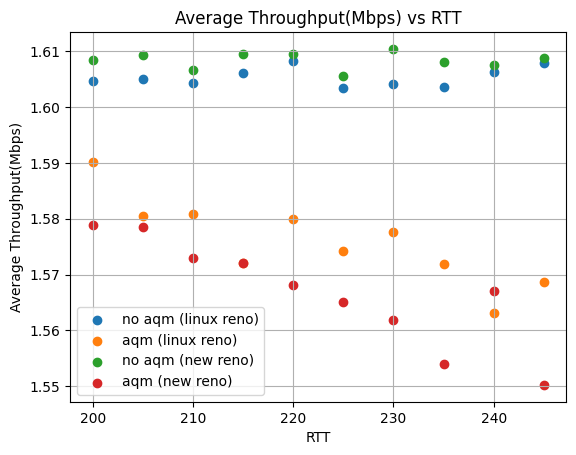

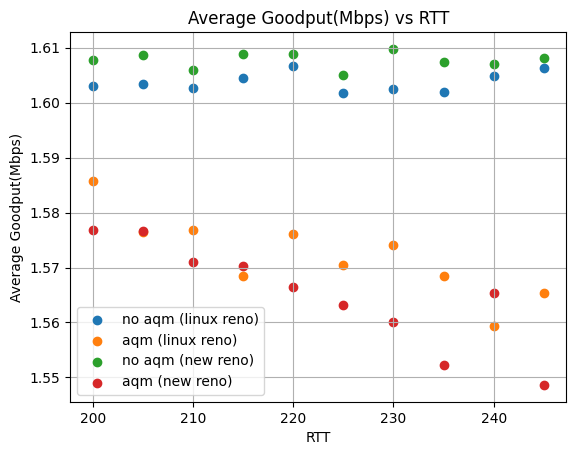

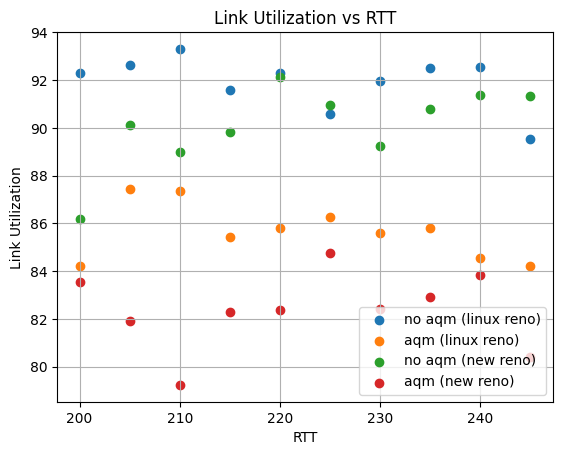

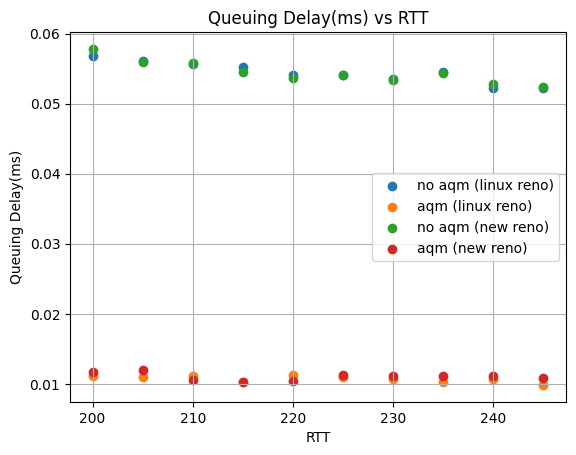

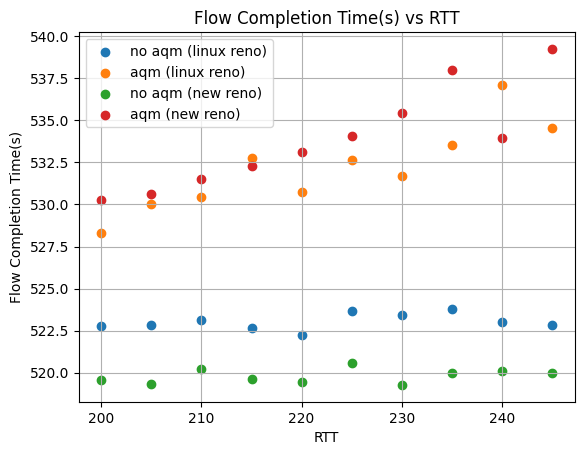

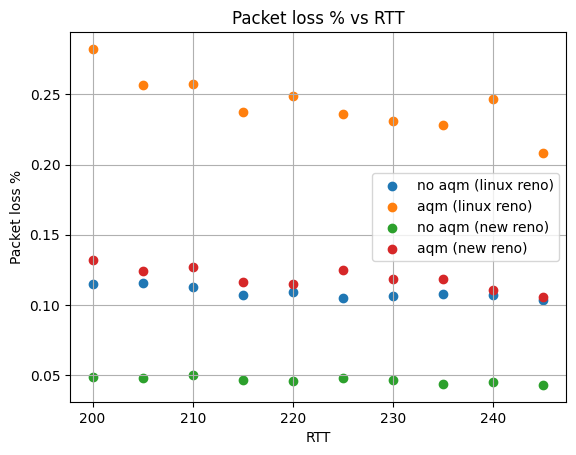

In [34]:
for c in cols:
    c  = c[0]
    plt.scatter(list(data_naqm_11["RTT"]), list(data_naqm_11[c]), label="no aqm (linux reno)")
    plt.scatter(list(data_aqm_11["RTT"]), list(data_aqm_11[c]), label = "aqm (linux reno)")
    plt.scatter(list(data_naqm_11_nr["RTT"]), list(data_naqm_11_nr[c]), label="no aqm (new reno)")
    plt.scatter(list(data_aqm_11_nr["RTT"]), list(data_aqm_11_nr[c]), label = "aqm (new reno)")
    plt.xlabel("RTT")
    plt.ylabel(c)
    plt.title(f"{c} vs RTT")
    plt.grid()
    plt.legend()
    plt.show()

### TCP linux reno

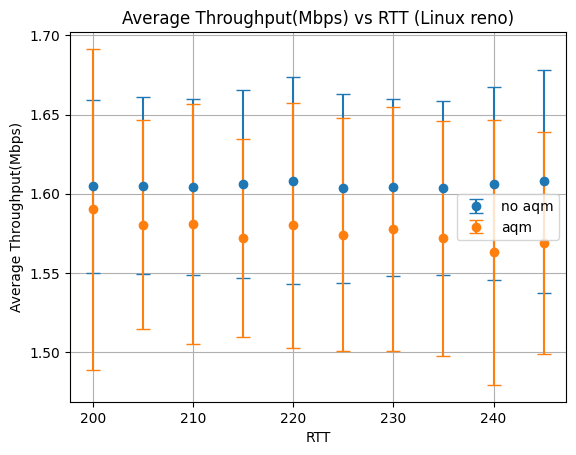

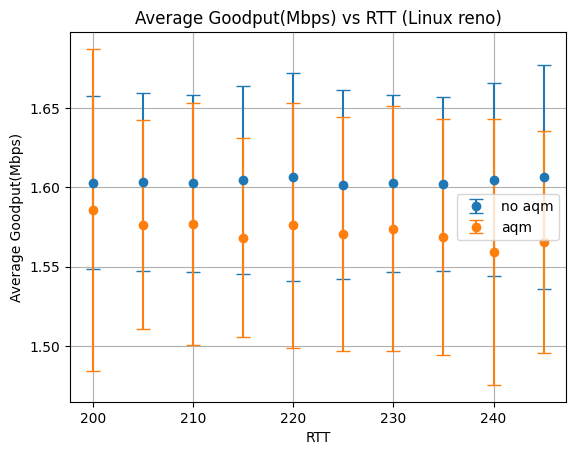

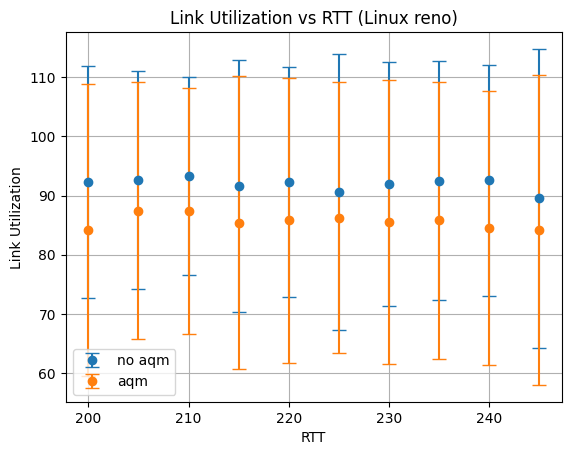

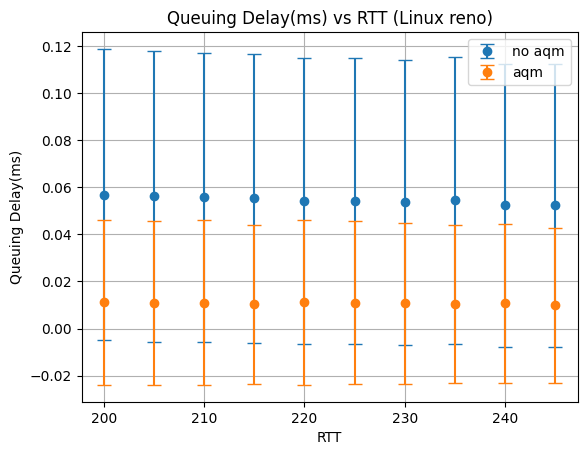

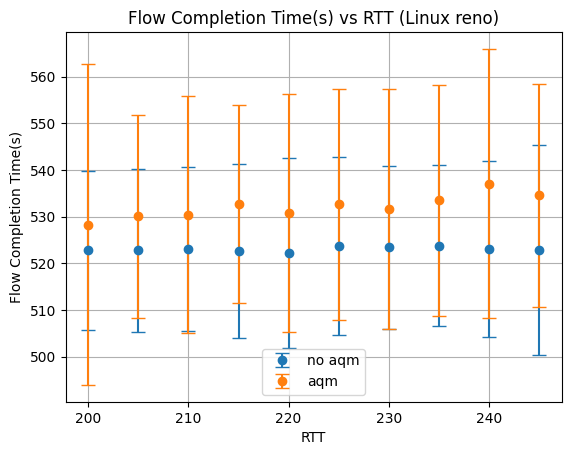

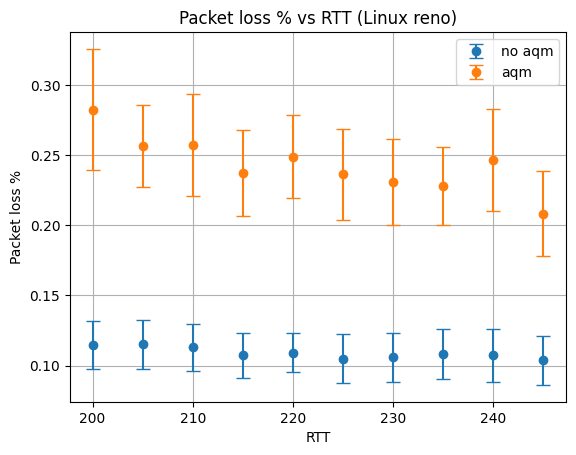

In [17]:
for c in cols:
    plt.errorbar(x=list(data_naqm_11["RTT"]), y=list(data_naqm_11[c[0]]), yerr=list(data_naqm_11[c[1]]), fmt='o', capsize=5, label = "no aqm")
    plt.errorbar(x=list(data_aqm_11["RTT"]), y=list(data_aqm_11[c[0]]), yerr=list(data_aqm_11[c[1]]), fmt='o', capsize=5, label = "aqm")
    plt.xlabel("RTT")
    plt.ylabel(c[0])
    plt.title(f"{c[0]} vs RTT (Linux reno)")
    plt.grid()
    plt.legend()
    plt.show()

### TCP new reno

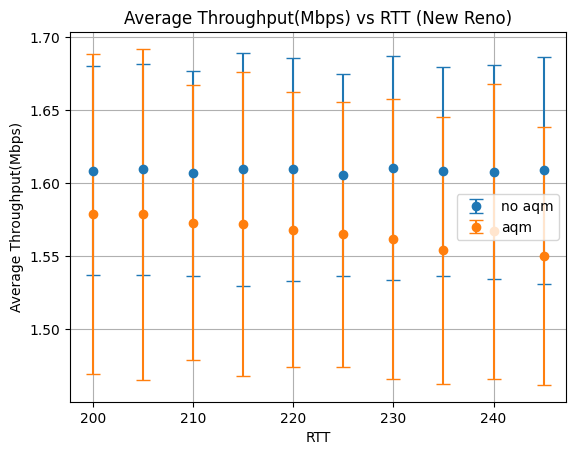

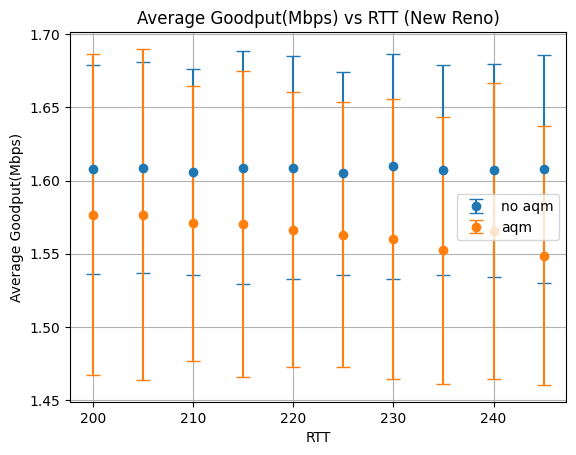

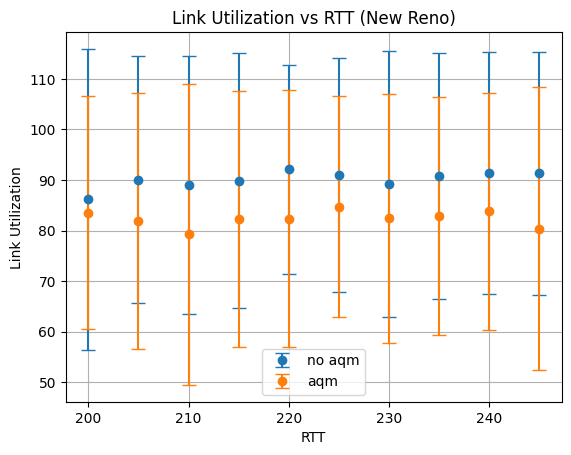

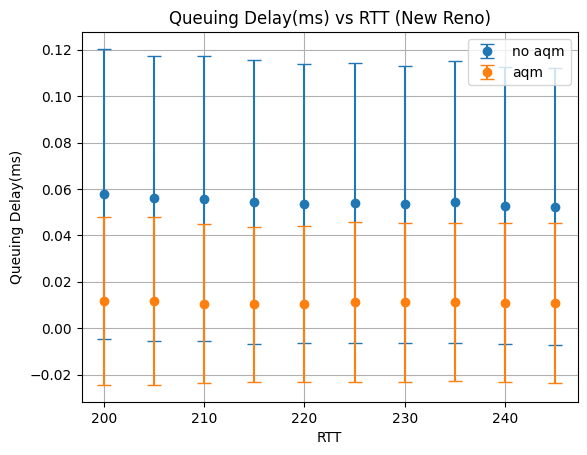

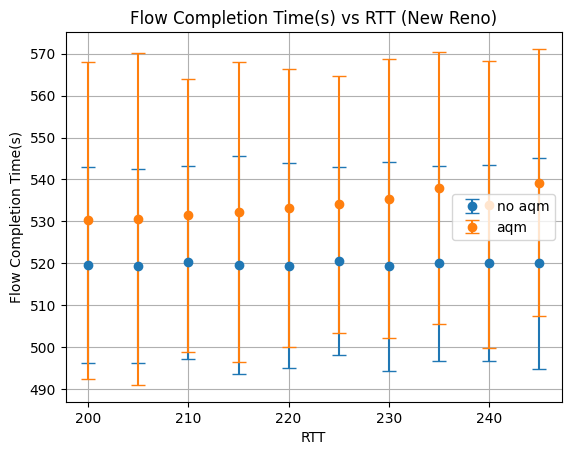

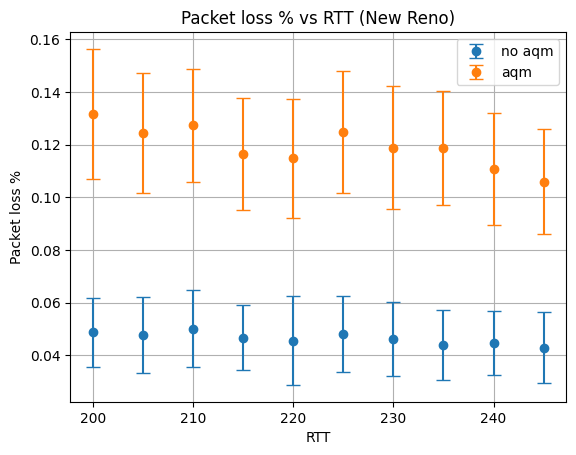

In [18]:
for c in cols:
    plt.errorbar(x=list(data_naqm_11_nr["RTT"]), y=list(data_naqm_11_nr[c[0]]), yerr=list(data_naqm_11_nr[c[1]]), fmt='o', capsize=5, label = "no aqm")
    plt.errorbar(x=list(data_aqm_11_nr["RTT"]), y=list(data_aqm_11_nr[c[0]]), yerr=list(data_aqm_11_nr[c[1]]), fmt='o', capsize=5, label = "aqm")
    plt.xlabel("RTT")
    plt.ylabel(c[0])
    plt.title(f"{c[0]} vs RTT (New Reno)")
    plt.grid()
    plt.legend()
    plt.show()